# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +60.99886218845                   -2.51    3.65s
  2   +55.51051881539        0.74       -1.38   65.6ms
  3   +40.94953592489        1.16       -1.02   13.3ms
  4   +33.08607328594        0.90       -0.88   38.6ms
  5   +13.57380251562        1.29       -0.71   16.6ms
  6   +10.35377067290        0.51       -0.77   9.94ms
  7   +8.943317142423        0.15       -0.69   13.1ms
  8   +8.365279933625       -0.24       -0.66   8.09ms
  9   +7.553948818555       -0.09       -0.64   12.8ms
 10   +6.653913196954       -0.05       -0.68   12.9ms
 11   +6.317128845963       -0.47       -0.71   8.05ms
 12   +6.031577168339       -0.54       -0.74   11.0ms
 13   +5.853896712510       -0.75       -0.73   8.10ms
 14   +5.753783444831       -1.00       -0.72   11.0ms
 15   +5.653857615212       -1.00       -0.82   10.9ms
 16   +5.652825874060       -2.99       -0.84   6.30ms
 17   +5.60

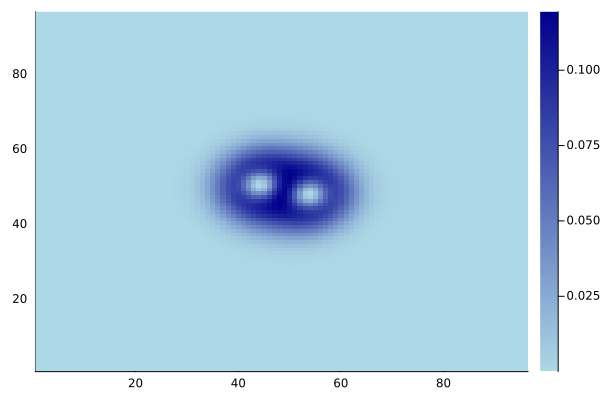

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)